<a href="https://colab.research.google.com/github/Rogerio-mack/ABCXYZ/blob/main/Oriba_ABCXYZ_ARIMA_v20220916.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"> 
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<br>
<br>
<br>
<br>
<br>

# ARIMA Forecast
---

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.8 MB 4.9 MB/s 
     |████████████████████████████████| 9.8 MB 29.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")


# Aquisição e Transformações dos Dados



In [ ]:
df = pd.read_excel('https://github.com/Rogerio-mack/ABCXYZ/raw/main/Base_Prof_15set22.xlsx')
df.head()

,Produtos,Foi vendido em 2021?,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,Bermuda Cargo Algodão Orgânico Light Azul Marinho,Bermuda Cargo Algodão Orgânico Light Azul Marinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,26
1,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,30
2,Bermuda Cargo Algodão Orgânico Light Preto,Bermuda Cargo Algodão Orgânico Light Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,19
3,Bermuda Cargo Algodão Orgânico Light Verde Oliva,Bermuda Cargo Algodão Orgânico Light Verde Oliva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,35
4,Bermuda Chambray Azul,Bermuda Chambray Azul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
df.columns

Index(['Produtos', 'Foi vendido em 2021?', '2018-01', '2018-02', '2018-03',
       '2018-04', '2018-05', '2018-06', '2018-07', '2018-08', '2018-09',
       '2018-10', '2018-11', '2018-12', '2019-01', '2019-02', '2019-03',
       '2019-04', '2019-05', '2019-06', '2019-07', '2019-08', '2019-09',
       '2019-10', '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
       '2020-04', '2020-05', '2020-06', '2020-07', '2020-08', '2020-09',
       '2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09',
       '2021-10', '2021-11', '2021-12'],
      dtype='object')

In [ ]:
# df = df.drop(columns=[ 'Classificação', 'R2', 'CV'])
df = df.drop(columns='Foi vendido em 2021?')
df.head()

,Produtos,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,...,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
0,Bermuda Cargo Algodão Orgânico Light Azul Marinho,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,26
1,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,30
2,Bermuda Cargo Algodão Orgânico Light Preto,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,19
3,Bermuda Cargo Algodão Orgânico Light Verde Oliva,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,35
4,Bermuda Chambray Azul,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0


In [ ]:
np.matrix(df.drop(columns='Produtos'))

matrix([[nan, nan, nan, ..., nan,  8., 26.],
        [nan, nan, nan, ..., nan, 12., 30.],
        [nan, nan, nan, ..., nan,  9., 19.],
        ...,
        [nan, nan, nan, ...,  3.,  2.,  2.],
        [nan, nan, nan, ...,  0.,  0.,  0.],
        [nan, nan, nan, ...,  0.,  0.,  0.]])

In [ ]:
np.matrix(df.drop(columns='Produtos')).T

matrix([[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ...,  3.,  0.,  0.],
        [ 8., 12.,  9., ...,  2.,  0.,  0.],
        [26., 30., 19., ...,  2.,  0.,  0.]])

In [ ]:
df_new = pd.DataFrame(np.matrix(df.drop(columns='Produtos')).T)
df_new.columns = df.Produtos.values

df_new.head()

,Bermuda Cargo Algodão Orgânico Light Azul Marinho,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,Bermuda Cargo Algodão Orgânico Light Preto,Bermuda Cargo Algodão Orgânico Light Verde Oliva,Bermuda Chambray Azul,Bermuda Chambray Preta,Bermuda Chambray Vermelha,Bermuda Chino Algodão Orgânico Relax Azul Marinho,Bermuda Chino Algodão Orgânico Relax Azul Médio,Bermuda Chino Algodão Orgânico Relax Off White,...,Suéter Gola V Azul Marinho,Suéter Gola V Cinza,Suéter Gola V Preta,Track Jacket OldSchool ORIBA+PACE Azul Marinho,Track Jacket OldSchool ORIBA+PACE Preto,Track Pants OldSchool ORIBA+PACE Azul Marinho,Track Pants OldSchool ORIBA+PACE Preto,Tricot Crewneck Patch ORIBA+PACE Preto,Tricot Listrado Navy/Off White,Tricot Listrado Off White/Navy
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df = df_new

In [ ]:
start='1/1/2018'
end='1/1/2022' 
freq='M'
index_dates = pd.date_range(start=start, end=end, freq=freq)
index_dates

DatetimeIndex(['2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
               '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
               '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31',
               '2019-01-31', '2019-02-28', '2019-03-31', '2019-04-30',
               '2019-05-31', '2019-06-30', '2019-07-31', '2019-08-31',
               '2019-09-30', '2019-10-31', '2019-11-30', '2019-12-31',
               '2020-01-31', '2020-02-29', '2020-03-31', '2020-04-30',
               '2020-05-31', '2020-06-30', '2020-07-31', '2020-08-31',
               '2020-09-30', '2020-10-31', '2020-11-30', '2020-12-31',
               '2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30', '2021-10-31', '2021-11-30', '2021-12-31'],
              dtype='datetime64[ns]', freq='M')

In [ ]:
df.index = index_dates
df.rename(columns={'Produtos':''})

df.head()

,Bermuda Cargo Algodão Orgânico Light Azul Marinho,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,Bermuda Cargo Algodão Orgânico Light Preto,Bermuda Cargo Algodão Orgânico Light Verde Oliva,Bermuda Chambray Azul,Bermuda Chambray Preta,Bermuda Chambray Vermelha,Bermuda Chino Algodão Orgânico Relax Azul Marinho,Bermuda Chino Algodão Orgânico Relax Azul Médio,Bermuda Chino Algodão Orgânico Relax Off White,...,Suéter Gola V Azul Marinho,Suéter Gola V Cinza,Suéter Gola V Preta,Track Jacket OldSchool ORIBA+PACE Azul Marinho,Track Jacket OldSchool ORIBA+PACE Preto,Track Pants OldSchool ORIBA+PACE Azul Marinho,Track Pants OldSchool ORIBA+PACE Preto,Tricot Crewneck Patch ORIBA+PACE Preto,Tricot Listrado Navy/Off White,Tricot Listrado Off White/Navy
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Bermuda Cargo Algodão Orgânico Light Azul Marinho    46
Bermuda Cargo Algodão Orgânico Light Cinza Chumbo    46
Bermuda Cargo Algodão Orgânico Light Preto           46
Bermuda Cargo Algodão Orgânico Light Verde Oliva     46
Bermuda Chambray Azul                                26
                                                     ..
Track Pants OldSchool ORIBA+PACE Azul Marinho        45
Track Pants OldSchool ORIBA+PACE Preto               44
Tricot Crewneck Patch ORIBA+PACE Preto               44
Tricot Listrado Navy/Off White                       17
Tricot Listrado Off White/Navy                       17
Length: 505, dtype: int64

In [ ]:
# do not ommit NA's

# print( df.shape )
# df = df.dropna(axis=1)
# print( df.shape )

(24, 505)
(24, 20)


In [ ]:
df.head()

,Bermuda Cargo Algodão Orgânico Light Azul Marinho,Bermuda Cargo Algodão Orgânico Light Cinza Chumbo,Bermuda Cargo Algodão Orgânico Light Preto,Bermuda Cargo Algodão Orgânico Light Verde Oliva,Bermuda Chambray Azul,Bermuda Chambray Preta,Bermuda Chambray Vermelha,Bermuda Chino Algodão Orgânico Relax Azul Marinho,Bermuda Chino Algodão Orgânico Relax Azul Médio,Bermuda Chino Algodão Orgânico Relax Off White,...,Suéter Gola V Azul Marinho,Suéter Gola V Cinza,Suéter Gola V Preta,Track Jacket OldSchool ORIBA+PACE Azul Marinho,Track Jacket OldSchool ORIBA+PACE Preto,Track Pants OldSchool ORIBA+PACE Azul Marinho,Track Pants OldSchool ORIBA+PACE Preto,Tricot Crewneck Patch ORIBA+PACE Preto,Tricot Listrado Navy/Off White,Tricot Listrado Off White/Navy
2018-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-03-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visualizando as demandas

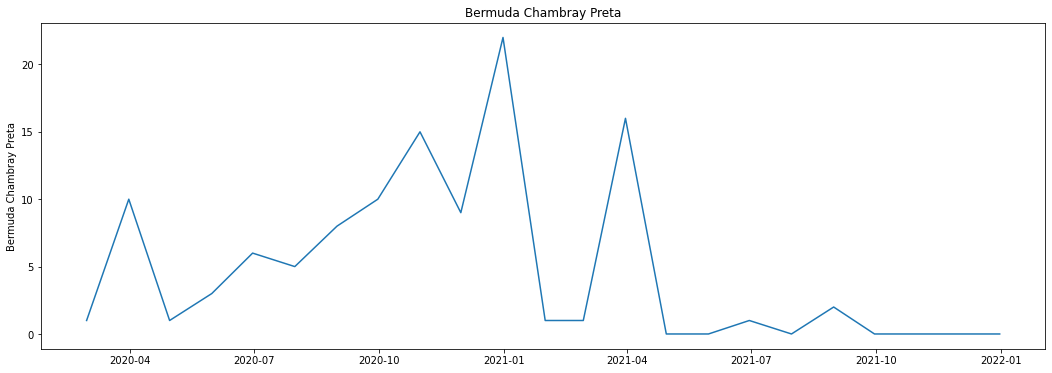

In [ ]:
plt.figure( figsize=(18,6))

sns.lineplot( x=df.index, y=df[ df.columns[ 5 ] ] )
plt.title( df.columns[ 5 ] )

plt.show()

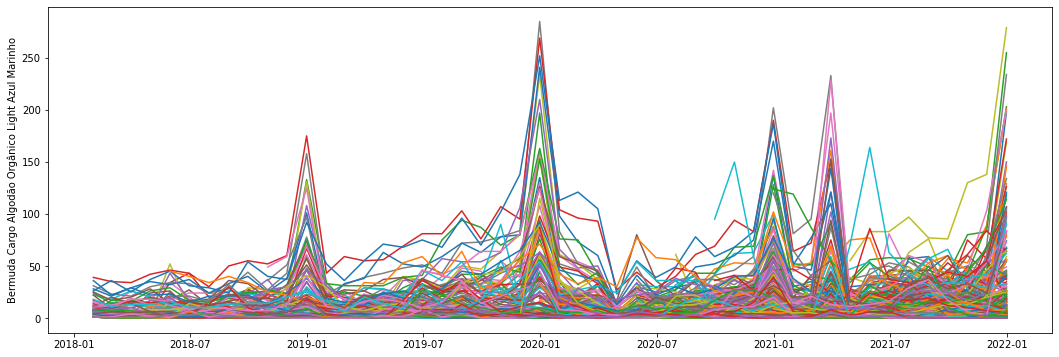

In [ ]:
plt.figure( figsize=(18,6))

for produto in df:
  sns.lineplot( x=df.index, y=df[produto] )

plt.show()

# Modelo ARIMA

In [ ]:
import pmdarima as pm
from pmdarima.model_selection import train_test_split

In [ ]:
produto = df.columns[5]

model = pm.auto_arima(df[produto].dropna(), seasonal=True, m=4)


In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   23
Model:                        SARIMAX   Log Likelihood                 -74.192
Date:                Fri, 16 Sep 2022   AIC                            152.384
Time:                        12:57:53   BIC                            154.655
Sample:                    02-29-2020   HQIC                           152.956
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.8261      2.042      2.364      0.018       0.824       8.828
sigma2        37.1002     14.883      2.493      0.013       7.929      66.271
===================================================================================
Ljung-Box (L1) (Q):                   0.91   Jarque-Bera (JB):                 7.17
Prob(Q):                              0.34   Prob(JB):                         0.03
Heteroskedasticity (H):               1.66   Skew:                             1.31
Prob(H) (two-sided):                  0.49   Kurtosis:                         3.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
model.aic()

152.38448002030216

# AIC

O Akaike Information Critera (AIC) é uma medida empregada para avaliar modelos estatísticos de previsão. Ele basicamente quantifica a qualidade do ajuste e a simplicidade/parcimônia do modelo em uma única estatística.

Ao comparar dois modelos, o de menor AIC geralmente é 'melhor'.

Para encontrar o melhor modelo, o auto-ARIMA otimiza para um determinado `information_criterion` dentre ('aic', 'aicc', 'bic', 'hqic', 'oob') (Akaike Information Criterion, Corrigido Akaike Information Criterion, Bayesian Critério de Informação, Critério de Informação de Hannan-Quinn, ou “fora da bolsa” – para pontuação de validação – respectivamente) e retorna o ARIMA que minimiza o valor.

In [ ]:
len( df.columns )

505

In [ ]:
AIC_list = []
AIC_produto_list = []
min_entries = 18
np.random.seed(1)

# for produto in df:                                                                  # run for All entries
for produto in df.columns[ np.random.random_integers(0,len( df.columns )-1,25) ]:     # run for 25 random entries
  
  # skip entries with few data
  AIC_produto_list.append(produto)
  if len(df[produto].dropna()) < min_entries:
    print(produto, ' has skipped, it has only ', len(df[produto].dropna()), ' data entries. Less than minimum ', min_entries)
    AIC_list.append(-1)
    continue
  print(produto, ' looking arima model for ', len(df[produto].dropna()), ' data entries')
  
  # run arima
  model = pm.auto_arima(df[produto].dropna(), information_criterion='aic', seasonal=True, m=12)
  AIC_list.append(model.aic())

df_AIC = pd.DataFrame()

# df_AIC['produto'] = df.columns      # replace to accept less than all products
df_AIC['produto'] = AIC_produto_list 

df_AIC['AIC'] = AIC_list  
    

Blusa Moletom Algodão Orgânico Gola C Preto  has skipped, it has only  7  data entries. Less than minimum  18
Camiseta Modal Com Capuz Verde Manga Longa  looking arima model for  25  data entries
Kit Henley Preta  looking arima model for  19  data entries
Calça Chino Azul Marinho  looking arima model for  48  data entries
Cinto Social Couro Preta  looking arima model for  38  data entries
Kit Henley Manga Longa Branca & Azul  looking arima model for  20  data entries
Camiseta Gola C Algodão Orgânico Listrada MAX Natural  has skipped, it has only  13  data entries. Less than minimum  18
Camisa Linho Off White Manga Longa  has skipped, it has only  12  data entries. Less than minimum  18
Kit Camisa Algodão Pima Oxford Rosa & Azul  looking arima model for  48  data entries
Polo Essencial Branca  has skipped, it has only  16  data entries. Less than minimum  18
Camisa Pima Clássica Azul  looking arima model for  48  data entries
Camisa Linho Azul Mescla Manga Longa  has skipped, it has onl

In [ ]:
df_AIC.sort_values('AIC')

,produto,AIC
0,Blusa Moletom Algodão Orgânico Gola C Preto,-1.000000
22,Short de Água Liso Off White,-1.000000
2,Kit Henley Preta,-1.000000
21,Kit Polo Essencial Manga Longa Azul & Branca,-1.000000
18,Henley Algodão Pima Branca Manga Curta,-1.000000
6,Camiseta Gola C Algodão Orgânico Listrada MAX ...,-1.000000
7,Camisa Linho Off White Manga Longa,-1.000000
16,Henley Algodão Pima Preta Manga Longa,-1.000000
9,Polo Essencial Branca,-1.000000
15,Kit Henley Algodão Orgânico Preta,-1.000000


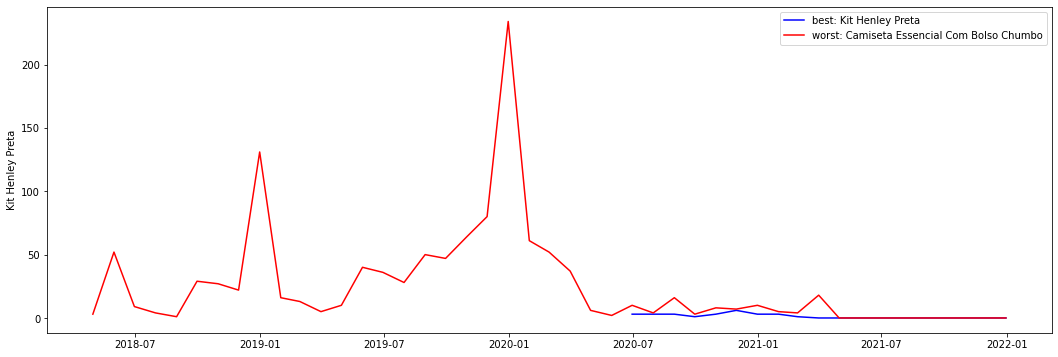

In [ ]:
plt.figure( figsize=(18,6))

sns.lineplot( x=df.index, y=df[ 'Kit Henley Preta' ], label='best: ' + 'Kit Henley Preta' , c='b' )
sns.lineplot( x=df.index, y=df[  'Camiseta Essencial Com Bolso Chumbo' ], label='worst: ' + 'Camiseta Essencial Com Bolso Chumbo' , c='r' )

plt.legend()

plt.show()

# Predict

In [ ]:
produto = 'Kit Henley Preta'

model = pm.auto_arima(df[produto].dropna(), seasonal=True, m=12)

print(model.summary())



                                SARIMAX Results                                 
Dep. Variable:                        y   No. Observations:                   19
Model:             SARIMAX(0, 1, 0, 12)   Log Likelihood                 -12.061
Date:                  Fri, 16 Sep 2022   AIC                             28.121
Time:                          13:57:25   BIC                             28.013
Sample:                      06-30-2020   HQIC                            26.784
                           - 12-31-2021                                         
Covariance Type:                    opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -3.1429      0.580     -5.418      0.000      -4.280      -2.006
sigma2         1.8367      0.954      1.925      0.054      -0.033       3.707
Ljung-Box (L1) (Q):                 

In [ ]:
fc, conf_int = model.predict(n_periods=3, return_conf_int=True)
print(fc, conf_int)

2022-01-31   -0.142857
2022-02-28   -2.142857
2022-03-31   -3.142857
Freq: M, dtype: float64 [[-2.79912157  2.51340728]
 [-4.79912157  0.51340728]
 [-5.79912157 -0.48659272]]


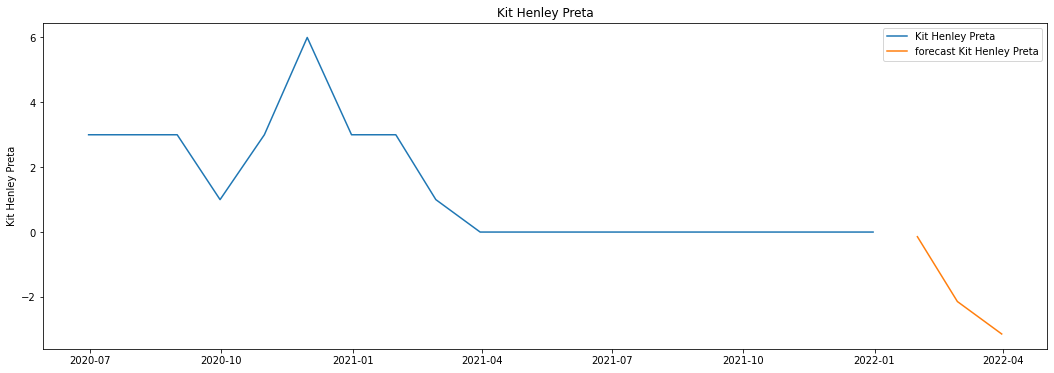

In [ ]:
plt.figure( figsize=(18,6))

sns.lineplot( x=df.index, y=df[produto], label=produto )
sns.lineplot( x=fc.index, y=fc.values, label='forecast ' + produto)
plt.title( produto )
plt.legend()

plt.show()

# Next

Algumas sugestões... afinal o trabalho é de vocês (rs)

1. O código foi adaptado. Executa o modelo arima e calcula o AIC para os produtos com mais de `min_entries = 18` entradas (o número ideal para capturar sazonalidades é ~40, com menos de 18 deve dar erro). Para os demais atribui AIC=-1. Rodei para 25 produtos aleatórios e fica para vocês rodarem para todos. Basta trocar o comentário das linhas abaixo e rodar tudo:

```
# for produto in df:                                                                  # run for All entries
for produto in df.columns[ np.random.random_integers(0,len( df.columns )-1,25) ]:     # run for 25 random entries
```

Se ganham um erro no processamento do arima pode ser necessário aumentar o número mínimo de entradas de 18, para 20 ou 24.

2. Precisam avançar no referencial teórico. Inclui o arima e ou outras métricas além do AIC. Para o CV e AIC já busquem descrever vantagens e desvantagens de empregar um ou outro. Isso está pendente desde a semana retrasada :-(

3. Depois de rodar distribuam os produtos nas categorias XYZ, de modo semelhante ao que fizeram o ABC e criem uma matriz de comparação das classes resultados CV X AIC. É uma matriz de confusão,

```
    AIC  X  Y  Z
CV  X    1  2  0
    Y    0  3  4
    Z    0  0  5

Por exemplo, os valores 1, 3 e 5 indicam os produtos que têm as mesmas classificações tanto no CV como no AIC. O 2 indica que 2 produtos tem classe Y no AIC (colunas) mas classe X no CV (linhas)

```

Podem fazer no excel se acharem mais fácil, mas é claro que não é esperado de façam manualmente. 

4. E aí, encaram fazer uma separação de dados treinamento e teste para medir os resíduos e empregar isso como mais uma métrica? Aqui precisam buscar entender do que falamos. Se tiverem dúvidas aqui tragam no próximo encontro. 